In [1]:
#Instalo librerias
!pip install selenium
!pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


In [2]:
#Importo libreraias
import requests
import bs4
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import re


In [3]:
#Aqui funciona la api

import pandas as pd

# URL del archivo Excel
url_archivo = "https://api.cafci.org.ar/pb_get"

# Leer el archivo Excel directamente desde su URL
try:
    df = pd.read_excel(url_archivo,header=None,skiprows=10)
    # Ahora puedes trabajar con el DataFrame df como lo harías normalmente
    print(df.head())  # Muestra las primeras filas del DataFrame como ejemplo
except Exception as e:
    print("Error al leer el archivo desde la URL:")
    print(e)


                                  0    1    2     3         4           5   \
0      Renta Variable Peso Argentina  NaN  NaN   NaN       NaN         NaN   
1  Gainvest Renta Variable - Clase A  ARS  Arg  Flex  12/04/24  268763.433   
2  Gainvest Renta Variable - Clase B  ARS  Arg  Flex  12/04/24   14625.193   
3  Gainvest Renta Variable - Clase C  ARS  Arg  Flex  12/04/24        1000   
4  MAF Acciones Argentinas - Clase A  ARS  Arg  Flex  12/04/24  407111.365   

           6      7           8      9   ...   34   35   36   37   38  39  40  \
0         NaN    NaN         NaN    NaN  ...  NaN  NaN  NaN  NaN  NaN NaN NaN   
1  272978.604 -1.544  268763.433  1.263  ...  0.0    N  ARS  2.0    N NaN NaN   
2   14854.365 -1.543   14625.193  1.285  ...  0.0    N  ARS  2.0    N NaN NaN   
3    1000.000  0.000    1000.000  0.000  ...  0.0    N  ARS  2.0    N NaN NaN   
4  412140.241 -1.220  407111.365  3.008  ...  0.0    N  ARS  2.0    N NaN NaN   

             41   42      43  
0           N

In [4]:
#Ahora que tengo el archivo descargado voy a categorizar los fondos para luego analizarlos en funcion de las mismas.
categorias=["Renta Variable Peso Argentina","Renta Variable Dolar Estadounidense Billete","Renta Variable Dolar Estadounidense", "Renta Fija Peso Argentina","Renta Fija Dolar Estadounidense","Renta Fija Dolar Estadounidense Billete","Renta Mixta Peso Argentina","Renta Mixta Dolar Estadounidense","Renta Mixta Dolar Estadounidense Billete","PyMes Peso Argentina","PyMes Dolar Estadounidense","Infraestructura Peso Argentina","Infraestructura Dolar Estadounidense","Retorno Total Peso Argentina","Retorno Total Dolar Estadounidense","RG900 Peso Argentina","Mercado de Dinero Peso Argentina","Mercado de Dinero Dolar Estadounidense"]



In [6]:
#Vemos como quedo lo nuestro
df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,Renta Variable Peso Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gainvest Renta Variable - Clase A,ARS,Arg,Flex,12/04/24,268763.433,272978.604,-1.544,268763.433,1.263,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,1.0
2,Gainvest Renta Variable - Clase B,ARS,Arg,Flex,12/04/24,14625.193,14854.365,-1.543,14625.193,1.285,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,1.0
3,Gainvest Renta Variable - Clase C,ARS,Arg,Flex,12/04/24,1000,1000.000,0.000,1000.000,0.000,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,1.0
4,MAF Acciones Argentinas - Clase A,ARS,Arg,Flex,12/04/24,407111.365,412140.241,-1.220,407111.365,3.008,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,"(*) Determinación del valor de la cuotaparte, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2790,(**) Liquidez sujeta a reprogramacion BCRA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2791,(***) Pago en especies previa autorizacion de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792,P/E Pago en especies.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Incorporo las categorias del cafci
categorias_separadas = []
datos_separados = []

# Inicializo la categoría actual
categoria_actual = None

# Itero sobre cada entrada de la primera columna
for entrada in df.iloc[:, 0]:
    # Verifico si la entrada coincide con alguna de las categorías
    for categoria in categorias:
        if categoria in entrada:
            # Si coincide, actualiza la categoría actual
            categoria_actual = categoria
            break

    # Agrego la categoría actual a la lista de categorías
    categorias_separadas.append(categoria_actual)

    # Agrego la entrada a la lista de datos
    datos_separados.append(entrada.replace(categoria_actual, "").strip())

# Agrego las listas separadas como nuevas columnas al DataFrame
df["Categoria"] = categorias_separadas
df["Datos"] = datos_separados

# Ahora el DataFrame contiene una nueva columna "Categoria" con las categorías separadas
# y una nueva columna "Datos" con los datos separado

In [8]:
#Previo a eliminar valores nulos elimino variables que no considero utiles
col_r = df.columns[24:44]


In [9]:
#Elimino columnas
datos_limpio = df.drop(columns=col_r)

In [10]:
#Vemos como quedo lo nuestro
datos_limpio

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,Categoria,Datos
0,Renta Variable Peso Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renta Variable Peso Argentina,
1,Gainvest Renta Variable - Clase A,ARS,Arg,Flex,12/04/24,268763.433,272978.604,-1.544,268763.433,1.263,...,0.067,Banco Comafi S.A.,651.0,EF-3,1031.0,311.0,115.0,StoneX Asset Management S.A.,Renta Variable Peso Argentina,Gainvest Renta Variable - Clase A
2,Gainvest Renta Variable - Clase B,ARS,Arg,Flex,12/04/24,14625.193,14854.365,-1.543,14625.193,1.285,...,0.859,Banco Comafi S.A.,651.0,EF-3,3685.0,311.0,115.0,StoneX Asset Management S.A.,Renta Variable Peso Argentina,Gainvest Renta Variable - Clase B
3,Gainvest Renta Variable - Clase C,ARS,Arg,Flex,12/04/24,1000,1000.000,0.000,1000.000,0.000,...,0,Banco Comafi S.A.,651.0,EF-3,3686.0,311.0,115.0,StoneX Asset Management S.A.,Renta Variable Peso Argentina,Gainvest Renta Variable - Clase C
4,MAF Acciones Argentinas - Clase A,ARS,Arg,Flex,12/04/24,407111.365,412140.241,-1.220,407111.365,3.008,...,0.104,Banco Mariva S.A.,635.0,A- (Arg),2477.0,371.0,436.0,Mariva Asset Management S.A.U.S.G.F.C.I.,Renta Variable Peso Argentina,MAF Acciones Argentinas - Clase A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,"(*) Determinación del valor de la cuotaparte, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercado de Dinero Dolar Estadounidense,"(*) Determinación del valor de la cuotaparte, ..."
2790,(**) Liquidez sujeta a reprogramacion BCRA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercado de Dinero Dolar Estadounidense,(**) Liquidez sujeta a reprogramacion BCRA.
2791,(***) Pago en especies previa autorizacion de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercado de Dinero Dolar Estadounidense,(***) Pago en especies previa autorizacion de ...
2792,P/E Pago en especies.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercado de Dinero Dolar Estadounidense,P/E Pago en especies.


In [11]:
#Ahora si el momento de borrar nulls
# Eliminar filas con valores nulos
datos_sin_nulos = datos_limpio.dropna()

In [13]:
#Ahora tengo como les asigno nombre a estas columnas
nombres_columnas = ['Nombre','Moneda', 'Región','Horizonte','Fecha', 'VCT0', 'VCT-1', 'Var%', 'Reexp.Pesos', 'VarCt-15', 'VarCt-104', 'VarCanual', 'QC', 'QC-1', 'PN0', 'PNt-1','MS','SD','CNV','CAL','CODCAF','CSG','CSD','SG','Categoria','Datos']

# Asigno los nombres a las columnas del DataFrame
datos_sin_nulos.columns = nombres_columnas

In [16]:
#Tratamos de scarnos de encima los outliers para variables numericas de rendimiento
columnas_a_transformar = ['VarCt-15', 'Var%', 'VarCt-104','VarCanual']

# Iteramos sobre las columnas especificadas
for columna in columnas_a_transformar:
    Q1 = datos_sin_nulos[columna].quantile(0.25)
    Q3 = datos_sin_nulos[columna].quantile(0.75)
    IQR = Q3 - Q1

    umbral_inferior = Q1 - 3 * IQR
    umbral_superior = Q3 + 3 * IQR

    # Filtramos los valores que están dentro del rango intercuartílico para la columna actual
    df_filt = datos_sin_nulos[(datos_sin_nulos[columna] >= umbral_inferior) & (datos_sin_nulos[columna] <= umbral_superior)]

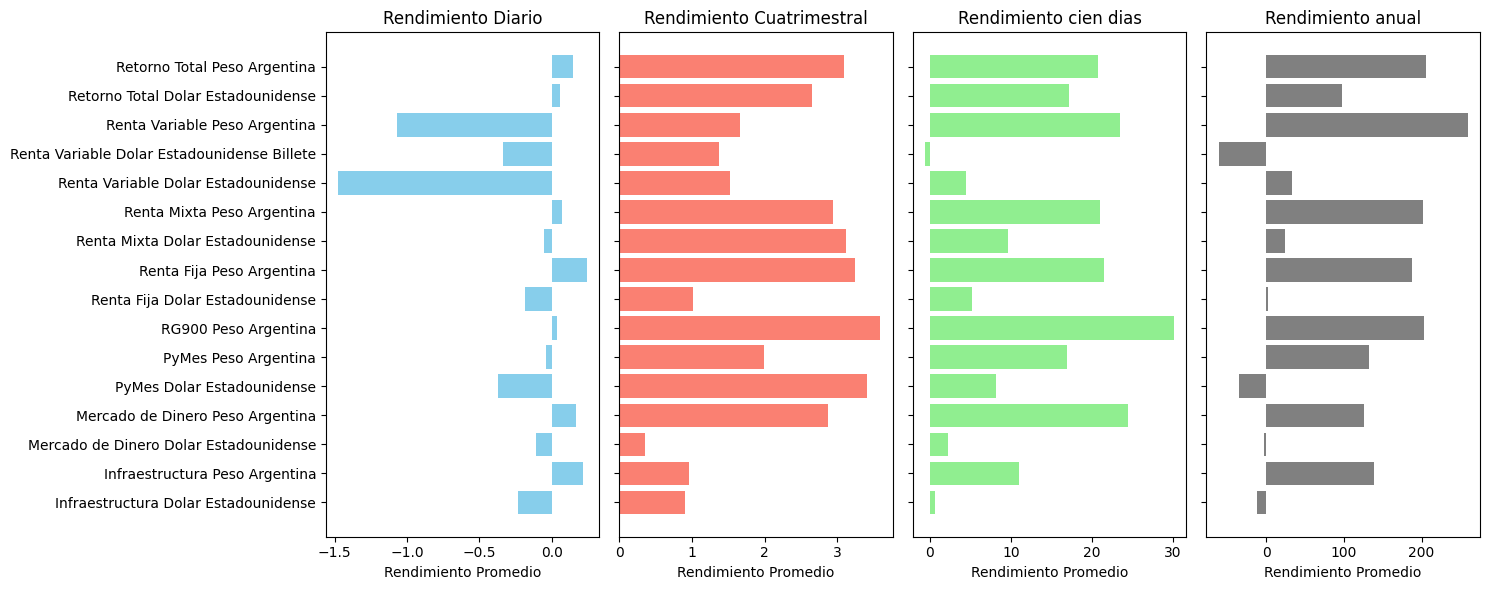

In [25]:
import matplotlib.pyplot as plt

# Calcular el rendimiento promedio por categoría
rendimiento_promediodiario = df_filt.groupby('Categoria')['Var%'].mean().reset_index()
rendimiento_promedio15 = df_filt.groupby('Categoria')['VarCt-15'].mean().reset_index()
rendimiento_promedio100 = df_filt.groupby('Categoria')['VarCt-104'].mean().reset_index()
rendimiento_promedioanual = df_filt.groupby('Categoria')['VarCanual'].mean().reset_index()
# Crear el gráfico de barras para el rendimiento promedio
fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)

# Subplot para rendimiento quincenal
axes[0].barh(rendimiento_promedio15['Categoria'], rendimiento_promediodiario['Var%'], color='skyblue')
axes[0].set_xlabel('Rendimiento Promedio')
axes[0].set_title('Rendimiento Diario')
# Subplot para rendimiento cuatrimestral
axes[1].barh(rendimiento_promedio15['Categoria'], rendimiento_promedio15['VarCt-15'], color='salmon')
axes[1].set_xlabel('Rendimiento Promedio')
axes[1].set_title('Rendimiento quincenal')

# Subplot para rendimiento anual
axes[2].barh(rendimiento_promedio100['Categoria'], rendimiento_promedio100['VarCt-104'], color='lightgreen')
axes[2].set_xlabel('Rendimiento Promedio')
axes[2].set_title('Rendimiento cien dias')
# Subplot para rendimiento anual
axes[3].barh(rendimiento_promedioanual['Categoria'], rendimiento_promedioanual['VarCanual'], color='gray')
axes[3].set_xlabel('Rendimiento Promedio')
axes[3].set_title('Rendimiento anual')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()



<ipython-input-26-dc7c56bd706e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y='Categoria',x='VarCt-15',ax=axes[0], data=df_filt, palette='Set2')
<ipython-input-26-dc7c56bd706e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y='Categoria',x='VarCt-104',ax=axes[1], data=df_filt, palette='Set2')
<ipython-input-26-dc7c56bd706e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y='Categoria',x='VarCanual',ax=axes[2], data=df_filt, palette='Set2')


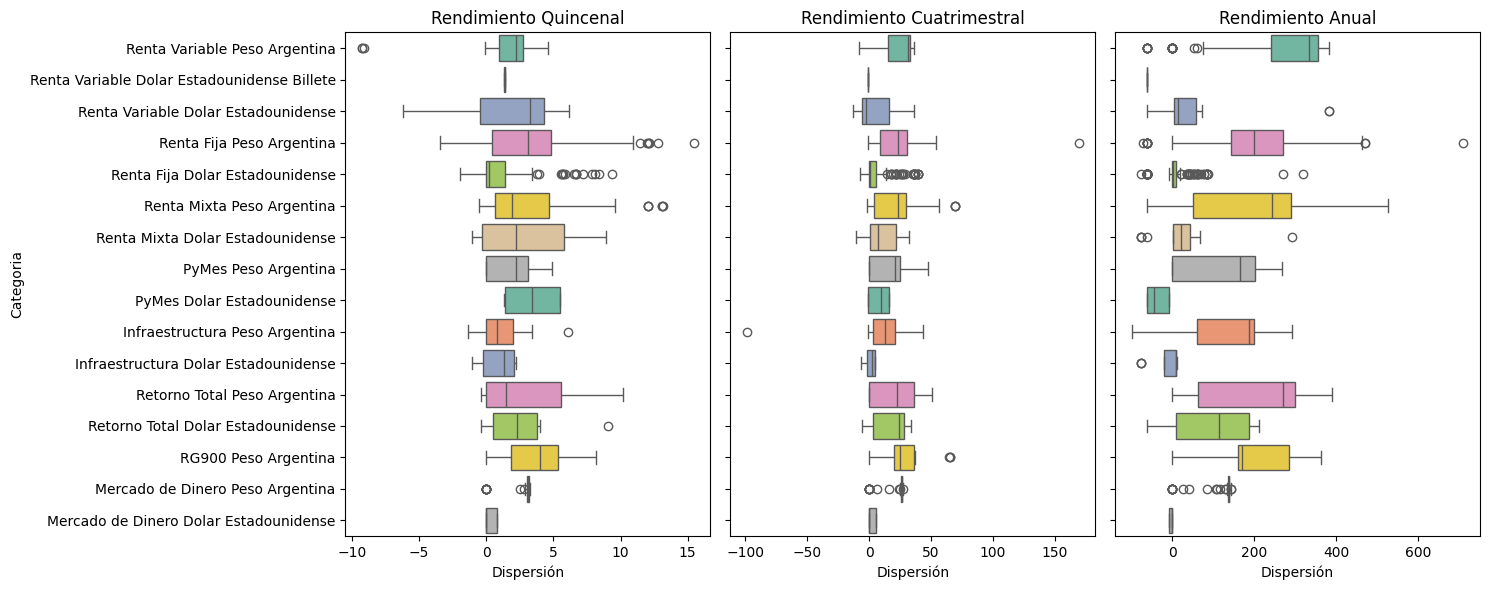

In [26]:
# Crear el boxplot por categoría
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.boxplot( y='Categoria',x='VarCt-15',ax=axes[0], data=df_filt, palette='Set2')
axes[0].set_xlabel('Dispersión')
axes[0].set_title('Rendimiento Quincenal')
sns.boxplot( y='Categoria',x='VarCt-104',ax=axes[1], data=df_filt, palette='Set2')
axes[1].set_xlabel('Dispersión')
axes[1].set_title('Rendimiento Cuatrimestral')
sns.boxplot( y='Categoria',x='VarCanual',ax=axes[2], data=df_filt, palette='Set2')
axes[2].set_xlabel('Dispersión')
axes[2].set_title('Rendimiento Anual')
# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()